In [10]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

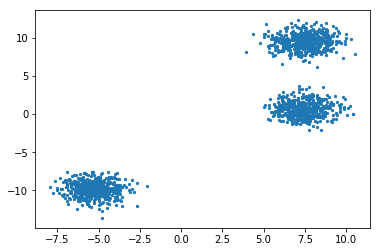

In [35]:
X = blobs[0]
ClusterUtils.visualize_sample_data(X)

In [47]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['GaussianMixture'], n_evaluations=20, seed=27)

Configuration space object:
  Hyperparameters:
    algorithm_choice, Type: Categorical, Choices: {GaussianMixture}, Default: GaussianMixture
    covariance_type___GaussianMixture, Type: Categorical, Choices: {full, tied, diag, spherical}, Default: full
    init_params___GaussianMixture, Type: Categorical, Choices: {kmeans, random}, Default: kmeans
    n_components___GaussianMixture, Type: UniformInteger, Range: [1, 20], Default: 5
    warm_start___GaussianMixture, Type: Categorical, Choices: {True, False}, Default: False
  Conditions:
    covariance_type___GaussianMixture | algorithm_choice in {'GaussianMixture'}
    init_params___GaussianMixture | algorithm_choice in {'GaussianMixture'}
    n_components___GaussianMixture | algorithm_choice in {'GaussianMixture'}
    warm_start___GaussianMixture | algorithm_choice in {'GaussianMixture'}

Optimization is complete, the optimal configuration is 
Configuration:
  algorithm_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixtur

In [48]:
opt_result

Configuration:
  algorithm_choice, Value: 'GaussianMixture'
  covariance_type___GaussianMixture, Value: 'full'
  init_params___GaussianMixture, Value: 'kmeans'
  n_components___GaussianMixture, Value: 3
  warm_start___GaussianMixture, Value: False

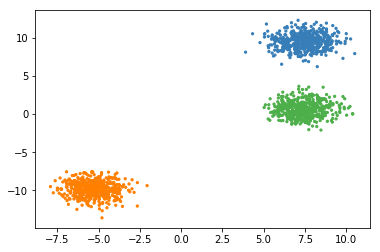

array([0, 0, 0, ..., 0, 1, 1])

In [49]:
autocluster.predict(X)

In [50]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   warm_start___GaussianMixture, Value: False
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0002086162567138672),
 TrajEntry(train_perf=-0.5394520348561118, incumbent_id=1, incumbent=Configuration:
   algorithm_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'full'
   init_params___GaussianMixture, Value: 'kmeans'
   n_components___GaussianMixture, Value: 5
   warm_start___GaussianMixture, Value: False
 , ta_runs=1, ta_time_used=0.24374985694885254, wallclock_time=0.25549912452697754),
 TrajEntry(train_perf=-0.8045283966369224, incumbent_id=2, incumbent=Configuration:
   algorithm_choice, Value: 'GaussianMixture'
   covariance_type___GaussianMixture, Value: 'diag'
   init_params___GaussianMixt

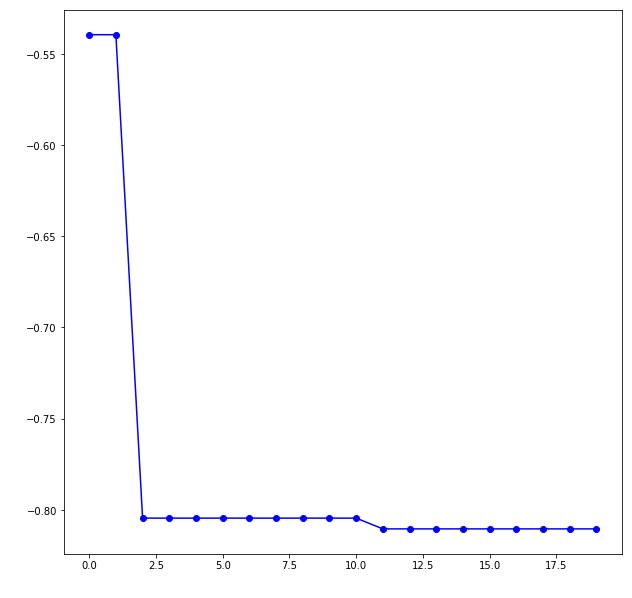

In [51]:
autocluster.plot_convergence()